In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import shap
import joblib
import matplotlib.pyplot as plt


In [2]:
train_data = pd.read_csv("../data/train_data.csv")
test_data = pd.read_csv("../data/test_data.csv")

In [3]:
X_train, y_train = train_data.drop(columns=['treatment']), train_data['treatment']
X_test, y_test = test_data.drop(columns=['treatment']), test_data['treatment']


In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

c:\Users\INDIA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:30:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

    lb = LabelBinarizer()
    y_test_binarised = lb.fit_transform(y_test)

    if y_test_binarised.shape[1] == y_prob.shape[1]:
        print("ROC-AUC:", roc_auc_score(y_test_binarised,y_prob, average='weighted', multi_class='ovr'))

    else:
        print("Warning: ROC-AUC skipped due to mismatch in class")

In [7]:
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       120
         2.0       0.82      0.83      0.83       132

    accuracy                           0.82       252
   macro avg       0.82      0.82      0.82       252
weighted avg       0.82      0.82      0.82       252

Accuracy: 0.8174603174603174
Precision: 0.8174020936479829
Recall: 0.8174603174603174
F1 Score: 0.8173795834123122

XGBoost Performance:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       120
         2.0       0.84      0.86      0.85       132

    accuracy                           0.84       252
   macro avg       0.84      0.84      0.84       252
weighted avg       0.84      0.84      0.84       252

Accuracy: 0.8373015873015873
Precision: 0.8373083706417038
Recall: 0.8373015873015873
F1 Score: 0.8371858865387525


In [8]:

X_train = pd.DataFrame(X_train, columns=train_data.drop(columns=['treatment']).columns)
X_test = pd.DataFrame(X_test, columns=test_data.drop(columns=['treatment']).columns)

y_train = pd.DataFrame(y_train, columns=['treatment'])
y_test = pd.DataFrame(y_test, columns=['treatment'])


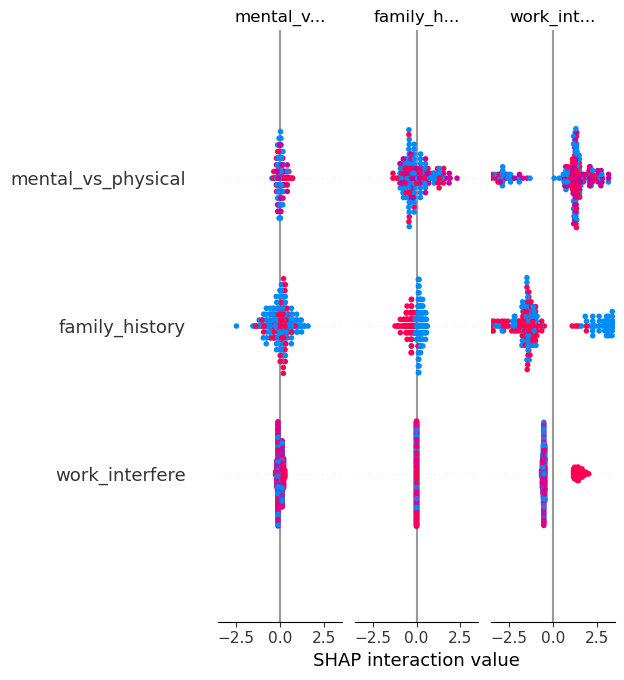

In [9]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [10]:
joblib.dump(xgb_model, "../models/mental_health_model.pkl")
print("Model saved successfully")

Model saved successfully
